## Problem Statement:
Predict the marks that a student is expected to score based upon the number of hours they studied.

## Approach:
As this problem involves only two variables,so we can simply  use Linear regression model to predict the marks.

In [1]:
#Import Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#load the dataset from the provided link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)

In [3]:
#display the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#check the count of rows and columns
df.shape

(25, 2)

In [5]:
#Get complete info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Get descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Check duplicate records
sum(df.duplicated())

0

In [8]:
#Check null values in thee dataset  
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualisation

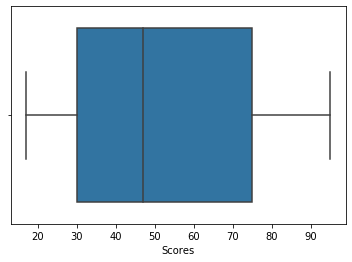

In [9]:
#Check Outliers
sns.boxplot(df['Scores'])

There is no outlier present in dependent varriable.

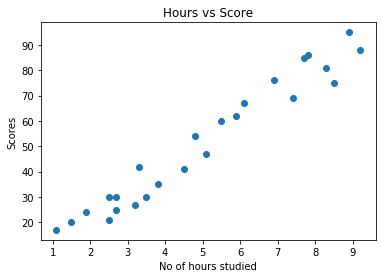

In [10]:
#Visualise the relation between hours and Score
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('No of hours studied')
plt.ylabel('Scores')
plt.title('Hours vs Score')
plt.show()

In [11]:
#Correlation
df['Hours'].corr(df['Scores'])

0.9761906560220887

## Split data in train and test

In [12]:
#Divide Dependent and Independent variables
X=df.iloc[: , :-1].values
y=df.iloc[:,1].values

In [13]:
#Split data in Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


## Prepare Model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
#Calculate intercept and slope
m=lm.coef_
c=lm.intercept_

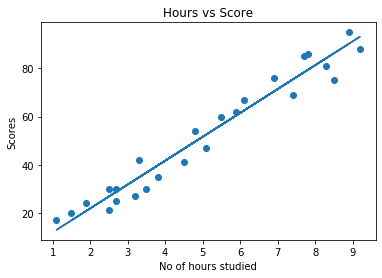

In [16]:
#Plot the regression line
line = m*X+c

#plot the train dataset
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel('No of hours studied')
plt.ylabel('Scores')
plt.title('Hours vs Score')
plt.show()

## Make Predictions

In [17]:
predicted_values= lm.predict(X_test)

In [18]:
predicted_values

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Compare Actual vs Predicted Values
df_new = pd.DataFrame({'Actual':y_test,'Predicted':predicted_values,'Absolute Error':abs(y_test-predicted_values)})
df_new

,Actual,Predicted,Absolute Error
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


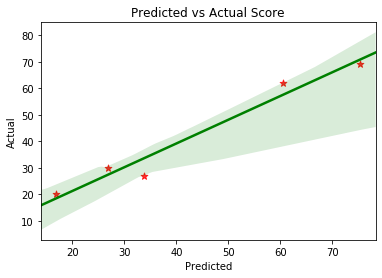

In [20]:
#Plot Predicted vs Actual Score
sns.regplot('Predicted','Actual',data=df_new,
            line_kws={'color':'green','linewidth':2.5},
            scatter_kws={'color':'red','s':50},marker='*')
plt.title('Predicted vs Actual Score')
plt.show()

## Evaluating the model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [22]:
mae = mean_absolute_error(y_test,predicted_values)
mse = mean_squared_error(y_test,predicted_values)
rmse=np.sqrt(mse)
r_squared = r2_score(y_test,predicted_values)
print('Mean Absolute Error = ',mae)
print('Mean Squared Error = ',mse)
print('Root Mean Squared Error = ',rmse)
print('R Square Value = ',r_squared)

Mean Absolute Error =  4.183859899002975
Mean Squared Error =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
R Square Value =  0.9454906892105356


### What will be predicted score if a student study for 9.25 hrs in a day?

In [25]:
#Test with given hour
Hour=9.25
predicted_score=lm.predict([[Hour]])
print(" If student study for {} hours in a day then predicted Score will be {} ".format(Hour,predicted_score.round(2)))


 If student study for 9.25 hours in a day then predicted Score will be [93.69] 
